In [1]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [28]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
# from deprecated.Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline, ChipTline, ChipResonatorsTwoTlines, ChipResonatorsThreeTlines, ChipAndersen
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

In [ ]:
Lk_12 = 12e-12 # For SiTUD20
Lk_24 = 24e-12 # For SiSC10
Lk_61 = 61e-12 # For GeHarry8
Lk_232 = 232e-12 # For SiChip5
epsilon_r_Si = 11.9
epsilon_r_Ge = [15.18, 16, 15.18, 16, 11.9]
thickness_subs_Si = 500e-6
thickness_subs_Ge = [50e-9, 20e-9, 600e-9, 300e-9, 600e-6]


In [7]:
FeedlineWidth12 = 80
FeedlineLength12  = 8000
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 400
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12, length_CPW=(FeedlineLength12 + FeedlineTaperLength12 + BondpadLength12)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 49.63979337993569 Ohm
Frequency of the feedline is 1.5642083010448666 GHz


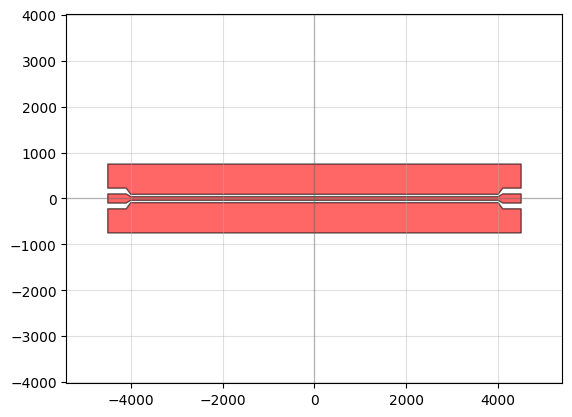

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\202507-SiRes-12pHsq-v3\\202507-SiRes-12pHsq-cka-Tline.gds'

In [8]:
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1500]

_, _, TLine12 = ChipTline(ChipSize12,
                          FeedlineWidth12, 
                          FeedlineLength12, 
                          FeedlineGap12, 
                          FeedlineTaperLength12, 
                          BondpadWidth12, 
                          BondpadLength12, 
                          BondpadGap12)
qp(TLine12)
TLine12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\202507-SiRes-12pHsq-v3\202507-SiRes-12pHsq-cka-Tline.gds")


Add 3 more resonators at high frequency

Resonator 1
Resonator 2
Resonator 3
Inductor total length is [355. 310. 235.]
The frequencies are [6.7569963197713445, 7.232516998964406, 8.307978527426965]


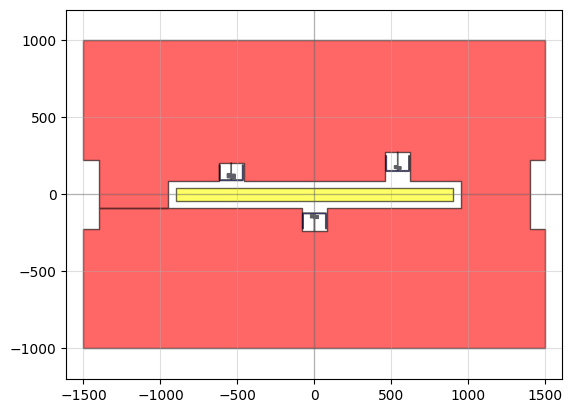

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\202507-SiRes-12pHsq-v3\\202507-SiRes-12pHsq-3-more-res-sim3.gds'

In [19]:

SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 3

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[ 4, 3, 2]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[ 50, 50, 40] 
InductorEndLength12 = np.ones(NumberOfResonators12)*( [65, 75, 85])
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*(NumberOfBends12+1)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*np.sort(np.linspace(60,0,3))
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('Inductor total length is', InductorTotalLength12)
print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 1800
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 400
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 2000]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, MWO_simulation=True)

qp(chip12)
chip12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\202507-SiRes-12pHsq-v3\202507-SiRes-12pHsq-3-more-res-sim3.gds")


Old resonators v3

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Resonator 5
Resonator 6
Inductor total length is [ 539.  651.  785.  975. 1245. 1680.]
The frequencies are [5.483827086913992, 4.991027426535848, 4.545848001063532, 4.079440871907611, 3.6104543603373203, 3.10834496121298]


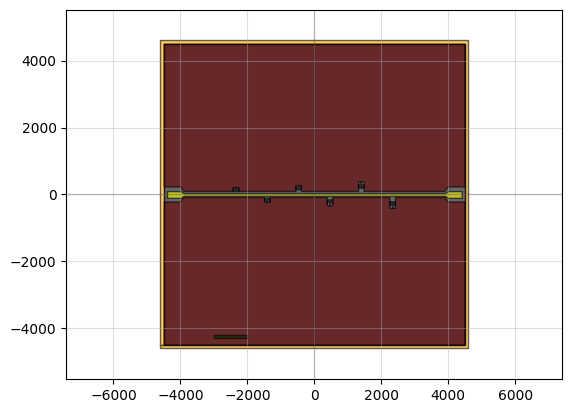

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\202507-SiRes-12pHsq-v3\\202507-SiRes-12pHsq-cka.gds'

In [14]:

SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 6

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[ 6, 6, 8, 9, 11, 14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[ 62,  78,  75,  82,  90,  100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*( [55,55] + [50] + [90]*3)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*(NumberOfBends12+1)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*np.sort(np.linspace(136,0,6))
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

freqs = []
for i in range(NumberOfResonators12):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth12[i]*1e-6, CapacitorWidth12[i]*1e-6, (SeparationTlineResonator12[i] + FeedlineGap12 + SpacingCc12[i])*1e-6 , FeedlineWidth12*1e-6,
                                            CapacitorVerticalLength12[i]*1e-6, SpacingC012[i]*1e-6,
                                            InductorWidth12[i]*1e-6, InductorTotalLength12[i]*1e-6, Lk_24,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('Inductor total length is', InductorTotalLength12)
print('The frequencies are', freqs)
FeedlineWidth12 = 80
FeedlineLength12  = 7800
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 400
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 9000]

c, metal, chip12 = ChipResonatorsTline(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, MWO_simulation=False)

qp(chip12)
chip12.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\202507-SiRes-12pHsq-v3\202507-SiRes-12pHsq-cka.gds")


Final chip
3 tlines, one without and two with resonators

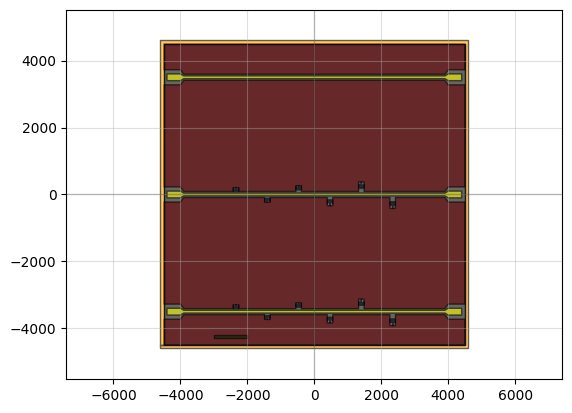

In [27]:
SeparationTlineResonator12 = [0]*7 + [5,0,10,0,10]
NumberOfResonators12 = 6

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[ 6, 6, 8, 9, 11, 14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[ 62,  78,  75,  82,  90,  100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*( [55,55] + [50] + [90]*3)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*(NumberOfBends12+1)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*np.sort(np.linspace(136,0,6))
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100




FeedlineWidth12 = 80
FeedlineLength12  = 7800
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 400
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 9000]

c, metal, chip12 = ChipResonatorsThreeTlines(ChipSize12, NumberOfResonators12, SeparationTlineResonator12,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength12, CapacitorVerticalLength12, CapacitorWidth12,
                        NumberOfBends12, InductorVerticalLength12, InductorHorizontalLength12, InductorWidth12, InductorEndLength12,
                        TaperWidth12, TaperLength12, SpacingC012, SpacingCc12,
                        FinalSpacingBondpads12, MWO_simulation=False,
                        ypos_tlines=[-3500, 0, 3500])
qp(chip12)

New Chip function

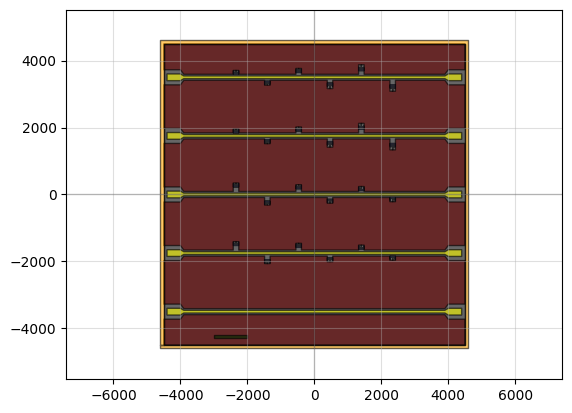

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\202507-SiRes-12pHsq-v3\\202507-SiRes-12pHsq-cka-v1.gds'

In [49]:
# Five Tlines, two sets of resonators

#First set of resonators: the old design from 12pHsq-v3
NumberOfResonators12 = 6
SeparationTlineResonator12 = np.zeros(NumberOfResonators12)

#Resonator parameters
CapacitorHorizontalLength12 = np.ones(NumberOfResonators12)*150
CapacitorVerticalLength12 = np.ones(NumberOfResonators12)*100
CapacitorWidth12 = np.ones(NumberOfResonators12)*5

NumberOfBends12 = np.ones(NumberOfResonators12, dtype=int)*[ 6, 6, 8, 9, 11, 14]
InductorVerticalLength12 = np.ones(NumberOfResonators12)*5
InductorHorizontalLength12 = np.ones(NumberOfResonators12)*[ 62,  78,  75,  82,  90,  100] 
InductorEndLength12 = np.ones(NumberOfResonators12)*( [55,55] + [50] + [90]*3)
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*(NumberOfBends12+1)
InductorWidth12 = np.ones(NumberOfResonators12)*0.6
TaperWidth12 = np.ones(NumberOfResonators12)*20

SpacingC012 = np.ones(NumberOfResonators12)*5
SpacingCc12 = np.ones(NumberOfResonators12)*np.sort(np.linspace(136,0,6))
TaperLength12 = np.ones(NumberOfResonators12)*5
FinalSpacingBondpads12 = 100

# Second set of resonators: the first three ones of above and the three new ones

NumberOfResonators = 6
SeparationTlineResonator = np.zeros(NumberOfResonators)

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*100
CapacitorWidth = np.ones(NumberOfResonators)*5

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[ 6, 6, 8,4,3,2]
InductorVerticalLength = np.ones(NumberOfResonators)*5
InductorHorizontalLength= np.ones(NumberOfResonators)*[ 62,  78,  75,50,50,40] 
InductorEndLength = np.ones(NumberOfResonators)*( [55,55] + [50] + [65, 75, 85])
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20

SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*np.linspace(136,0,6)
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100

# All together
SeparationTlineResonator = (SeparationTlineResonator12 , SeparationTlineResonator)


CapacitorHorizontalLength = (CapacitorHorizontalLength12, CapacitorHorizontalLength)
CapacitorVerticalLength = (CapacitorVerticalLength12, CapacitorVerticalLength)
CapacitorWidth = (CapacitorWidth12, CapacitorWidth)
NumberOfBends = (NumberOfBends12, NumberOfBends)
InductorVerticalLength = (InductorVerticalLength12, InductorVerticalLength)
InductorHorizontalLength = (InductorHorizontalLength12, InductorHorizontalLength)
InductorEndLength = (InductorEndLength12, InductorEndLength)
InductorWidth = (InductorWidth12, InductorWidth)
TaperWidth = (TaperWidth12, TaperWidth)
SpacingC0 = (SpacingC012, SpacingC0)
SpacingCc = (SpacingCc12, SpacingCc)
TaperLength = (TaperLength12, TaperLength)

#Tline parameters
FeedlineWidth12 = 80
FeedlineLength12  = 7800
FeedlineGap12 = 50
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 400
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12 + 2*FinalSpacingBondpads12, 9000]


c, metal, chip_cka = ChipAndersen(ChipSize12, NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth12, FeedlineLength12, FeedlineGap12, 
                        FeedlineTaperLength12, BondpadWidth12, BondpadLength12, BondpadGap12,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth,InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,FinalSpacingBondpads = 100,
                        MWO_simulation = False,
                        cap_sim = False,
                        ypos_tlines =[3500, 1750, 0, -1750, -3500],)

qp(chip_cka)
chip_cka.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\202507-SiRes-12pHsq-v3\202507-SiRes-12pHsq-cka-v1.gds")